<a href="https://colab.research.google.com/github/viveknarapongu2801/vivek/blob/main/Copy_of_imbalanced_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np


#step1:- read the training the data

In [10]:
df_train=pd.read_csv('/content/train.csv')

In [11]:
df_train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9.0,1.0,5.0,8.0,0.0,1.0,1.0,0.0,0.0,1.0
1,9,0,1,1,7,0,0,0,0,1,...,3.0,1.0,1.0,9.0,0.0,1.0,1.0,0.0,1.0,0.0
2,13,0,5,4,9,1,0,0,0,1,...,4.0,2.0,7.0,7.0,0.0,1.0,1.0,0.0,1.0,0.0
3,16,0,0,1,2,0,0,1,0,0,...,2.0,2.0,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0
4,17,0,0,2,0,1,0,1,0,0,...,3.0,1.0,1.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0


#step2:- give an description about the training data

In [12]:
df_train.describe()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
count,210592.000000,210592.000000,210592.000000,210592.000000,210592.000000,210592.000000,210592.000000,210592.000000,210592.000000,210592.000000,...,210591.000000,210591.000000,210591.000000,210591.000000,210591.000000,210591.000000,210591.000000,210591.000000,210591.000000,210591.000000
mean,263319.462178,0.036450,1.900186,1.358470,4.423786,0.417433,0.405490,0.393320,0.256097,0.163938,...,5.447123,1.442816,2.873437,7.533788,0.122921,0.628996,0.554886,0.287705,0.349464,0.154166
std,151824.309840,0.187407,1.984275,0.663703,2.701890,0.493397,1.350406,0.488488,0.436477,0.370220,...,2.330928,1.203547,1.697180,2.746657,0.328347,0.483075,0.496980,0.452694,0.476802,0.361109
min,7.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,132054.750000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,1.000000,2.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,263661.500000,0.000000,1.000000,1.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,5.000000,1.000000,3.000000,7.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,394928.500000,0.000000,3.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000,0.000000,...,7.000000,2.000000,4.000000,9.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,526129.000000,1.000000,7.000000,4.000000,11.000000,1.000000,6.000000,1.000000,1.000000,1.000000,...,19.000000,10.000000,13.000000,23.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
target_counts=df_train.target.value_counts()
print('class : 0',target_counts[0])
print('class : 1',target_counts[1])
print('percantage of 0 ',round(target_counts[0]*100/(target_counts[0]+target_counts[1]),2))

class : 0 202916
class : 1 7676
percantage of 0  96.36


#step3:  define the problem with undersampling and oversampling

Undersampling and oversampling are techniques used to address imbalanced datasets, where the number of instances in one class is significantly lower than in others.

**Undersampling:**
- Reduces the number of instances in the majority class to balance the dataset.
- Can lead to loss of potentially useful information from the majority class.
- May result in a model that doesn't perform well on unseen data, especially if the removed instances were important for capturing the underlying patterns.

**Oversampling:**
- Increases the number of instances in the minority class by replicating existing instances or generating synthetic ones.
- Can lead to overfitting, where the model performs well on the training data but poorly on unseen data, especially if the synthetic instances are not representative of the true distribution.
- May increase the training time due to the larger dataset size.

#step4:- install the imbalnce learning and explain what us use of imbalance learning

In [14]:
!pip install imbalanced-learn

The `imbalanced-learn` library is a powerful tool in Python specifically designed to work with imbalanced datasets. It provides a variety of resampling techniques, including:

- **Undersampling methods:** Such as RandomUnderSampler, NearMiss, and ClusterCentroids, which reduce the number of instances in the majority class.
- **Oversampling methods:** Such as RandomOverSampler, SMOTE (Synthetic Minority Over-sampling Technique), and ADASYN (Adaptive Synthetic Sampling), which increase the number of instances in the minority class.
- **Combination of over- and undersampling methods:** Like SMOTEENN and SMOTETomek, which apply both techniques.

Using these techniques helps to create a more balanced dataset, which can improve the performance of machine learning models on tasks involving imbalanced data.

#step5:- apply the undersampling with imb learning and evaluate the model by using metrics

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Remove 'id' and 'target' columns
labels = df_train.columns[2:]
df_train = df_train.dropna()

X = df_train[labels]
y = df_train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


Shape of X_train before undersampling: (168472, 57)
Shape of X_resampled after undersampling: (12202, 57)
Distribution of target variable before undersampling:
 target
0    162371
1      6101
Name: count, dtype: int64
Distribution of target variable after undersampling:
 target
0    6101
1    6101
Name: count, dtype: int64


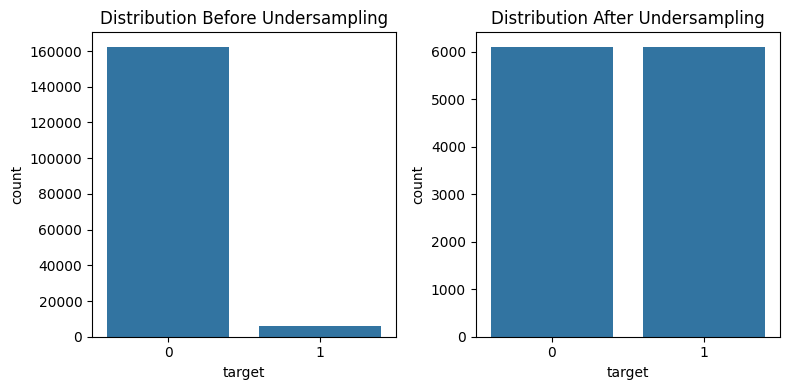

In [16]:
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Shape of X_train before undersampling:", X_train.shape)
print("Shape of X_resampled after undersampling:", X_resampled.shape)
print("Distribution of target variable before undersampling:\n", y_train.value_counts())

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution Before Undersampling')

print("Distribution of target variable after undersampling:\n", y_resampled.value_counts())

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution After Undersampling')
plt.tight_layout()
plt.show()

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 52.31%


#step6:- apply the oversampling with imb learning and evaluate the model by using metrics

Shape of X_train before oversampling: (168472, 57)
Shape of X_resampled after oversampling: (324742, 57)
Distribution of target variable before oversampling:
 target
0    162371
1      6101
Name: count, dtype: int64
Distribution of target variable after oversampling:
 target
0    162371
1    162371
Name: count, dtype: int64


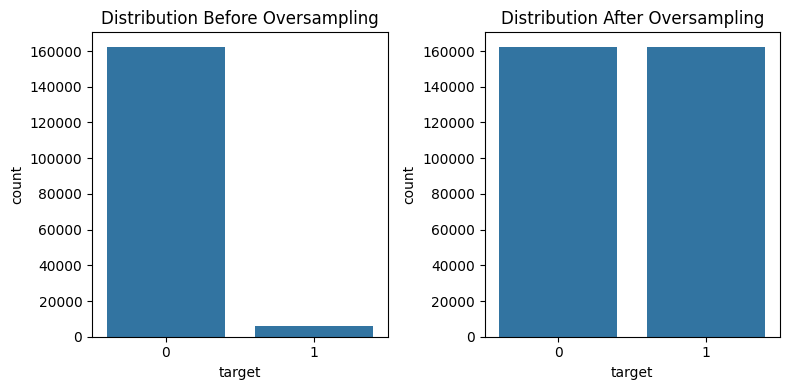

In [18]:
from imblearn.over_sampling import RandomOverSampler
import matplotlib.pyplot as plt
import seaborn as sns

rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Shape of X_train before oversampling:", X_train.shape)
print("Shape of X_resampled after oversampling:", X_resampled.shape)
print("Distribution of target variable before oversampling:\n", y_train.value_counts())
print("Distribution of target variable after oversampling:\n", y_resampled.value_counts())

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution Before Oversampling')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled)
plt.title('Distribution After Oversampling')
plt.tight_layout()
plt.show()

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier()
model.fit(X_resampled, y_resampled)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 92.82%


#step7:- combine both the undersampling and over sampling and evaluate the model

In [ ]:

from imblearn.combine import SMOTETomek
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Combine oversampling and undersampling
smotetomek = SMOTETomek(random_state=42)
X_resampled_combined, y_resampled_combined = smotetomek.fit_resample(X_train, y_train)

print("Shape of X_train before resampling:", X_train.shape)
print("Shape of X_resampled_combined after resampling:", X_resampled_combined.shape)
print("Distribution of target variable before resampling:\n", y_train.value_counts())
print("Distribution of target variable after resampling:\n", y_resampled_combined.value_counts())

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title('Distribution Before Resampling')

plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_combined)
plt.title('Distribution After Resampling')
plt.tight_layout()
plt.show()


# Train a Decision Tree model on the resampled data
model_combined = DecisionTreeClassifier()
model_combined.fit(X_resampled_combined, y_resampled_combined)

# Make predictions on the test set
y_pred_combined = model_combined.predict(X_test)

# Evaluate the model
accuracy_combined = accuracy_score(y_test, y_pred_combined)
print("\nAccuracy after combined resampling: %.2f%%" % (accuracy_combined * 100.0))